In [3]:
import pandas as pd
import os 

In [20]:
import os
import pandas as pd
from collections import defaultdict

def build_topic_matrix(data_root="data", min_count_threshold=5):
    platform_folders = {
        "tiktok": "tiktok",
        "twitter": "twitter",
        "youtube": "youtube",
        "bluesky": "bluesky"
    }

    date_cols = {
        "tiktok": "create_time",
        "twitter": "date",
        "youtube": "publishedAt",
        "bluesky": "created_at"
    }

    # Alias mapping: filename prefix → standardized outlet name
    outlet_aliases = {
        "cnnnews": "cnn",
        "fox": "foxnews",
        "foxnews": "foxnews",
        "nyt": "nytimes",
        "nytimes": "nytimes",
        "huffingtonpost": "huffpost",
        "huffpost": "huffpost",
        "bbc": "bbc",
        "reuters": "reuters",
        "reuters_com": "reuters",
        "abcnews": "abc",
        "abc": "abc",
    }

    # Build nested result
    outlet_matrix = defaultdict(dict)

    for platform_key, folder in platform_folders.items():
        folder_path = os.path.join(data_root, folder)
        if not os.path.isdir(folder_path):
            continue

        for file in os.listdir(folder_path):
            if file.endswith("_with_sections.csv"):
                try:
                    raw_name = file.split("_")[0].lower()
                    outlet_name = outlet_aliases.get(raw_name, raw_name)  # standardize name

                    file_path = os.path.join(folder_path, file)
                    df = pd.read_csv(file_path)

                    date_col = date_cols.get(platform_key.lower())
                    if date_col not in df.columns or "merged_section" not in df.columns:
                        outlet_matrix[outlet_name][platform_key.capitalize()] = "Missing columns"
                        continue

                    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
                    df = df.dropna(subset=[date_col])

                    if len(df) >= min_count_threshold:
                        topic_counts = df["merged_section"].value_counts(normalize=True).round(3)
                        outlet_matrix[outlet_name][platform_key.capitalize()] = topic_counts.to_dict()
                    else:
                        outlet_matrix[outlet_name][platform_key.capitalize()] = "Not enough data"
                except Exception as e:
                    outlet_matrix[outlet_name][platform_key.capitalize()] = f"Error: {e}"

    # Convert to DataFrame
    rows = []
    for outlet, platform_data in outlet_matrix.items():
        row = {"Outlet": outlet}
        for platform in platform_folders.keys():
            row[platform.capitalize()] = platform_data.get(platform.capitalize(), "File not found")
        rows.append(row)

    return pd.DataFrame(rows)


In [21]:
df_matrix = build_topic_matrix(data_root="data")
df_matrix


,Outlet,Tiktok,Twitter,Youtube,Bluesky
0,foxnews,"{'Politics': 0.449, 'World': 0.136, 'Crime': 0...","{'Politics': 0.39, 'Sports': 0.122, 'Crime': 0...","{'Politics': 0.689, 'World': 0.16, 'Crime': 0....",File not found
1,npr,"{'Politics': 0.182, 'World': 0.182, 'Breaking ...",File not found,"{'Politics': 0.241, 'World': 0.177, 'General N...",File not found
2,reuters,"{'Politics': 0.192, 'World': 0.169, 'Entertain...","{'Business & Economy': 0.404, 'Politics': 0.15...","{'World': 0.25, 'Politics': 0.207, 'Business &...","{'Business & Economy': 0.4, 'Sports': 0.205, '..."
3,dailywire,"{'Politics': 0.273, 'Entertainment': 0.182, 'L...","{'Politics': 0.534, 'World': 0.167, 'Defense &...","{'Politics': 0.903, 'Entertainment': 0.032, 'J...",File not found
4,vice,"{'Entertainment': 0.605, 'Lifestyle': 0.116, '...",File not found,"{'Arts & Culture': 0.407, 'Entertainment': 0.2...",File not found
5,huffpost,"{'Politics': 0.647, 'Sports': 0.088, 'Entertai...",File not found,"{'Politics': 0.444, 'Health': 0.333, 'Entertai...","{'Politics': 0.343, 'Entertainment': 0.201, 'L..."
6,nytimes,"{'Politics': 0.275, 'World': 0.209, 'Breaking ...","{'Sports': 0.308, 'Politics': 0.238, 'World': ...","{'Politics': 0.423, 'World': 0.282, 'Entertain...","{'Politics': 0.25, 'World': 0.11, 'Sports': 0...."
7,bbcnews,"{'Entertainment': 0.187, 'World': 0.175, 'Poli...",File not found,"{'World': 0.338, 'Unknown': 0.182, 'Politics':...",File not found
8,msnbc,"{'Politics': 0.722, 'World': 0.081, 'Breaking ...",File not found,"{'Politics': 0.674, 'World': 0.106, 'Breaking ...","{'Politics': 0.484, 'Opinion': 0.161, 'World':..."
9,nowthisimpact,"{'Politics': 0.478, 'Health': 0.102, 'Entertai...",File not found,"{'Politics': 0.473, 'Entertainment': 0.11, 'He...",File not found


In [22]:
import pandas as pd

def extract_platform_distribution(df_matrix, platform="Tiktok"):
    platform_rows = []

    for _, row in df_matrix.iterrows():
        outlet = row["Outlet"]
        dist = row.get(platform)

        if isinstance(dist, dict):
            for topic, value in dist.items():
                platform_rows.append({
                    "Outlet": outlet,
                    "Topic": topic,
                    "Proportion": value
                })

    return pd.DataFrame(platform_rows)

# Example usage:
tiktok_df = extract_platform_distribution(df_matrix, "Tiktok")
print(tiktok_df.head())


    Outlet               Topic  Proportion
0  foxnews            Politics       0.449
1  foxnews               World       0.136
2  foxnews               Crime       0.090
3  foxnews       Entertainment       0.090
4  foxnews  Defense & Security       0.075


In [ ]:
import pandas as pd
from collections import Counter

def get_overall_topic_distribution(df_matrix, platform="Tiktok"):
    topic_counter = Counter()

    for _, row in df_matrix.iterrows():
        dist = row.get(platform)
        if isinstance(dist, dict):
            topic_counter.update(dist)

    total = sum(topic_counter.values())
    if total == 0:
        return pd.DataFrame(columns=["Topic", "Proportion"])

    topic_proportions = {topic: round(count / total, 3) for topic, count in topic_counter.items()}
    return pd.DataFrame(list(topic_proportions.items()), columns=["Topic", "Proportion"]).sort_values("Proportion", ascending=False)

# Example usage:
overall_tiktok_df = get_overall_topic_distribution(df_matrix, "Tiktok")
overall_tiktok_df


In [28]:
import pandas as pd
from collections import defaultdict

def build_topic_platform_matrix(df_matrix, platforms=["Tiktok", "Twitter", "Youtube", "Bluesky"], threshold=0.05):
    topic_totals = defaultdict(lambda: defaultdict(float))

    for _, row in df_matrix.iterrows():
        for platform in platforms:
            dist = row.get(platform)
            if isinstance(dist, dict):
                for topic, value in dist.items():
                    if value >= threshold:
                        topic_totals[topic][platform] += value

    # Build matrix without normalization
    matrix_data = {
        topic: {
            platform: round(topic_totals[topic][platform], 3)
            for platform in platforms
        }
        for topic in topic_totals
    }

    return pd.DataFrame.from_dict(matrix_data, orient="index").fillna(0).sort_index()

# Example usage:
topic_platform_df = build_topic_platform_matrix(df_matrix, threshold=0.05)
topic_platform_df


,Tiktok,Twitter,Youtube,Bluesky
Arts & Culture,0.161,0.000,0.463,0.000
Arts & Entertainment,0.076,0.000,0.000,0.000
Breaking News,0.471,0.120,0.197,0.182
Business & Economy,0.240,0.803,0.181,0.682
Crime,0.250,0.784,0.239,0.610
Defense & Security,0.075,0.054,0.000,0.000
Education,0.083,0.000,0.056,0.000
Entertainment,1.643,1.779,0.819,0.500
General News,0.000,0.104,0.418,0.000
Health,0.735,0.120,0.904,0.456


In [32]:
import pandas as pd

def build_nth_topic_matrix(df_matrix, rank=1, platforms=["Tiktok", "Twitter", "Youtube", "Bluesky"]):
    """
    Build an Outlet x Platform matrix showing the nth most mentioned topic for each outlet-platform pair.
    rank=1 gives the top topic, rank=2 gives the second most, etc.
    """
    result_rows = []

    for _, row in df_matrix.iterrows():
        outlet = row["Outlet"]
        result_row = {"Outlet": outlet}

        for platform in platforms:
            dist = row.get(platform)

            if isinstance(dist, dict) and len(dist) >= rank:
                sorted_topics = sorted(dist.items(), key=lambda x: x[1], reverse=True)
                nth_topic = sorted_topics[rank - 1][0]  # rank is 1-based
                result_row[platform] = nth_topic
            else:
                result_row[platform] = None  # Not enough data

        result_rows.append(result_row)

    return pd.DataFrame(result_rows)


# Get second most mentioned topics:
second_topics_df = build_nth_topic_matrix(df_matrix, rank=2)

# Get top topic:
top_topics_df = build_nth_topic_matrix(df_matrix, rank=1)

# Get third topic:
third_topics_df = build_nth_topic_matrix(df_matrix, rank=3)

second_topics_df


,Outlet,Tiktok,Twitter,Youtube,Bluesky
0,foxnews,World,Sports,World,None
1,npr,World,None,World,None
2,reuters,World,Politics,Politics,Sports
3,dailywire,Entertainment,World,Entertainment,None
4,vice,Lifestyle,None,Entertainment,None
5,huffpost,Sports,None,Health,Entertainment
6,nytimes,World,Politics,World,World
7,bbcnews,World,None,Unknown,None
8,msnbc,World,None,World,Opinion
9,nowthisimpact,Health,None,Entertainment,None


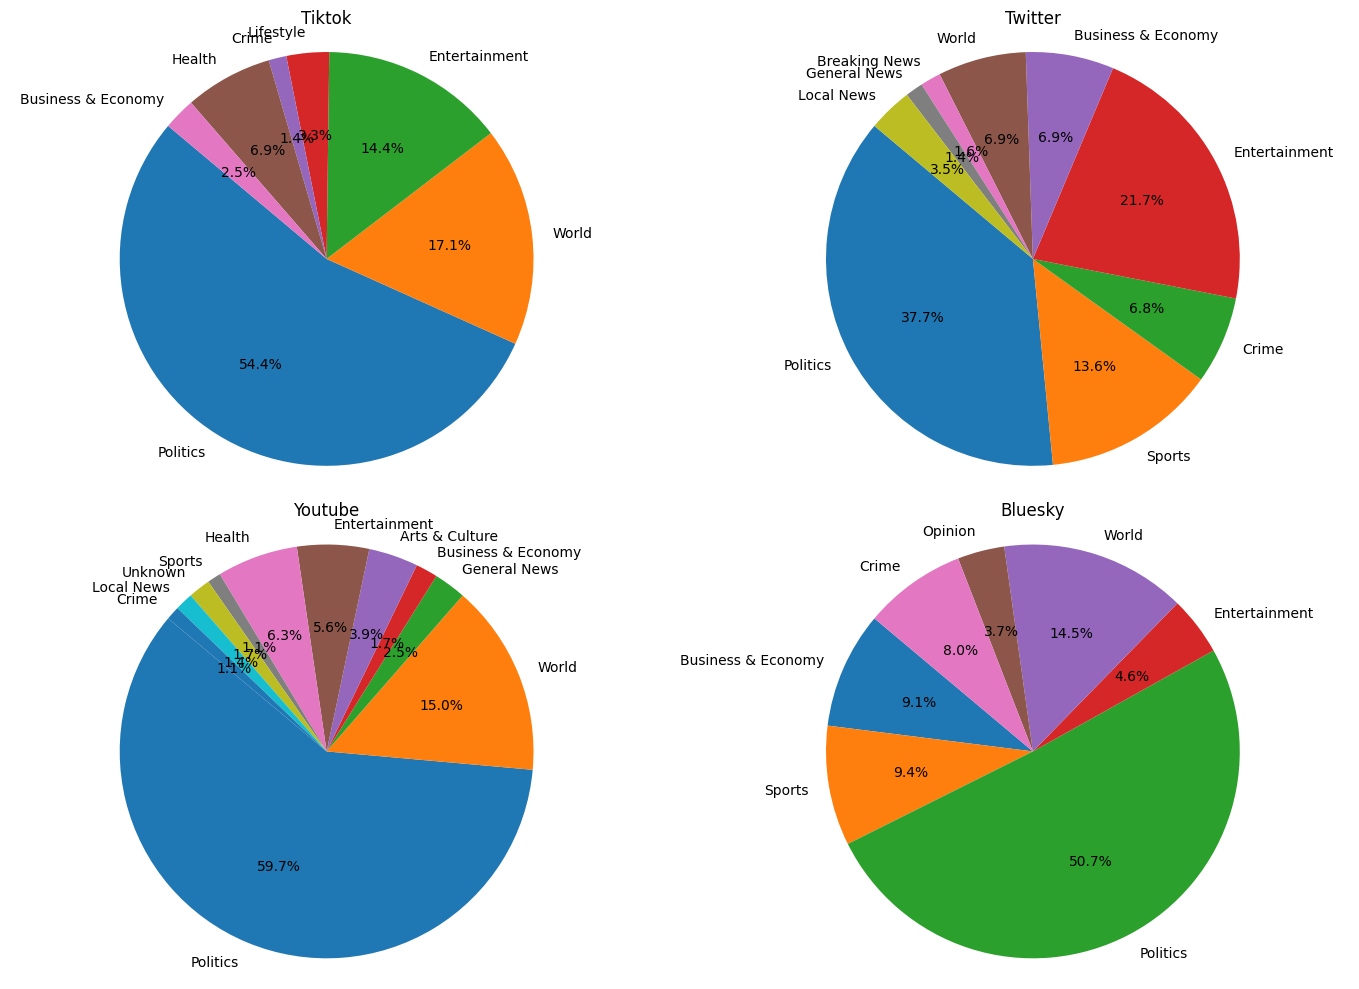

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Simulated structure: df_matrix has topic distributions as dicts in platform columns
# This function assumes df_matrix is already defined and contains 'Tiktok', 'Twitter', 'Youtube', 'Bluesky' columns

def plot_platform_comparison_pies(df_matrix, platforms=["Tiktok", "Twitter", "Youtube", "Bluesky"], threshold=0.05):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, platform in enumerate(platforms):
        topic_counter = Counter()

        for _, row in df_matrix.iterrows():
            dist = row.get(platform)
            if isinstance(dist, dict):
                for topic, value in dist.items():
                    if value >= threshold:
                        topic_counter[topic] += value

        if not topic_counter:
            axes[i].set_title(f"{platform} (No Data)")
            axes[i].axis('off')
            continue

        labels = list(topic_counter.keys())
        sizes = list(topic_counter.values())
        axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        axes[i].axis('equal')
        axes[i].set_title(platform)

    plt.tight_layout()
    plt.show()

# Call the function (assuming df_matrix is already defined in the session)
plot_platform_comparison_pies(df_matrix,threshold=0.1)


In [100]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import jensenshannon
from scipy.stats import entropy
from itertools import combinations
from collections import defaultdict

# Assuming df_matrix is already defined in memory with topic distributions as dicts
platforms = ["Twitter", "Bluesky"]

# --- 1. Within-Outlet Strategy Divergence Across Platforms ---
def compute_within_outlet_divergence(df_matrix):
    results = []
    for _, row in df_matrix.iterrows():
        outlet = row["Outlet"]
        topic_dists = {p: pd.Series(row[p]) for p in platforms if isinstance(row[p], dict)}
        if len(topic_dists) < 2:
            results.append({"Outlet": outlet, "Mean_JSD": None})
            continue
        all_topics = set().union(*[s.index for s in topic_dists.values()])
        pairwise_jsd = [
            jensenshannon(s1.reindex(all_topics, fill_value=0), s2.reindex(all_topics, fill_value=0))
            for (p1, s1), (p2, s2) in combinations(topic_dists.items(), 2)
        ]
        mean_jsd = np.mean(pairwise_jsd)
        results.append({"Outlet": outlet, "Mean_JSD": round(mean_jsd, 4)})
    return pd.DataFrame(results)

# --- 2. Platform Homogenization Score Across Outlets ---
def compute_platform_divergence(df_matrix):
    platform_vectors = defaultdict(list)
    for _, row in df_matrix.iterrows():
        for p in platforms:
            if isinstance(row[p], dict):
                platform_vectors[p].append(pd.Series(row[p], name=row["Outlet"]))
    results = []
    for p, vectors in platform_vectors.items():
        if len(vectors) < 2:
            results.append({"Platform": p, "Mean_JSD": None})
            continue
        all_topics = set().union(*[v.index for v in vectors])
        pairwise_jsd = [
            jensenshannon(s1.reindex(all_topics, fill_value=0), s2.reindex(all_topics, fill_value=0))
            for s1, s2 in combinations(vectors, 2)
        ]
        mean_jsd = np.mean(pairwise_jsd)
        results.append({"Platform": p, "Mean_JSD": round(mean_jsd, 4)})
    return pd.DataFrame(results)

# --- 3. Entropy of Topic Distribution ---
def compute_entropy_scores(df_matrix):
    rows = []
    for _, row in df_matrix.iterrows():
        outlet = row["Outlet"]
        for p in platforms:
            if isinstance(row[p], dict) and len(row[p]) > 0:
                vec = pd.Series(row[p])
                ent = entropy(vec, base=2)
                rows.append({"Outlet": outlet, "Platform": p, "Entropy": round(ent, 4)})
    return pd.DataFrame(rows)

# --- Run All Metrics ---
within_outlet = compute_within_outlet_divergence(df_matrix)
platform_wide = compute_platform_divergence(df_matrix)
entropy_df = compute_entropy_scores(df_matrix)

# View Results
print("\n1. Within-Outlet Divergence Across Platforms:\n", within_outlet.sort_values(by='Mean_JSD'))
print("\n2. Platform-Level Homogenization Across Outlets:\n", platform_wide)
print("\n3. Topic Entropy Per Outlet-Platform:\n", entropy_df)



1. Within-Outlet Divergence Across Platforms:
             Outlet  Mean_JSD
10             cnn    0.2416
2          reuters    0.2626
6          nytimes    0.3238
0          foxnews       NaN
1              npr       NaN
3        dailywire       NaN
4             vice       NaN
5         huffpost       NaN
7          bbcnews       NaN
8            msnbc       NaN
9    nowthisimpact       NaN
11             vox       NaN
12  washingtonpost       NaN
13         newsmax       NaN
14       breitbart       NaN
15             abc       NaN
16  chicagotribune       NaN
17             bbc       NaN
18         latimes       NaN
19          nypost       NaN
20       voxdotcom       NaN
21         nowthis       NaN
22         cbsnews       NaN
23         nbcnews       NaN
24     theguardian       NaN

2. Platform-Level Homogenization Across Outlets:
   Platform  Mean_JSD
0  Twitter    0.4670
1  Bluesky    0.3558

3. Topic Entropy Per Outlet-Platform:
             Outlet Platform  Entropy
0      

1. Within-Outlet Divergence Across Platforms (Mean JSD)

Interpretation:
Higher values → The outlet tailors its content more distinctly per platform.
Reuters has the highest JSD → suggesting it's more strategic or differentiated in how it shares content across TikTok, Twitter, and YouTube.
FoxNews has the lowest → meaning it shares more consistent content across platforms.


2. Platform-Level Homogenization Across Outlets (Mean JSD)
Measures how similar all outlets are on each platform.
Platform	Mean JSD
TikTok	0.4728
Twitter	0.4670
YouTube	0.4761
Interpretation:
Higher values → Outlets on that platform differ more in their topic usage.
Lower values → Outlets converge and look more similar in what they post.
Here, all three platforms are equally diverse in terms of outlet strategies.
YouTube shows the highest divergence, suggesting more varied strategies by outlets there.


3. Topic Entropy Per Outlet-Platform
Measures how diverse each outlet's content is on a single platform.
Outlet	Platform	Entropy
foxnews	TikTok	2.8608
foxnews	Twitter	3.0980
foxnews	YouTube	1.7055
Interpretation:
Higher entropy → more diverse set of topics.
Lower entropy → more concentrated on a few topics.
FoxNews posts the most varied content on Twitter, and is most focused on YouTube.


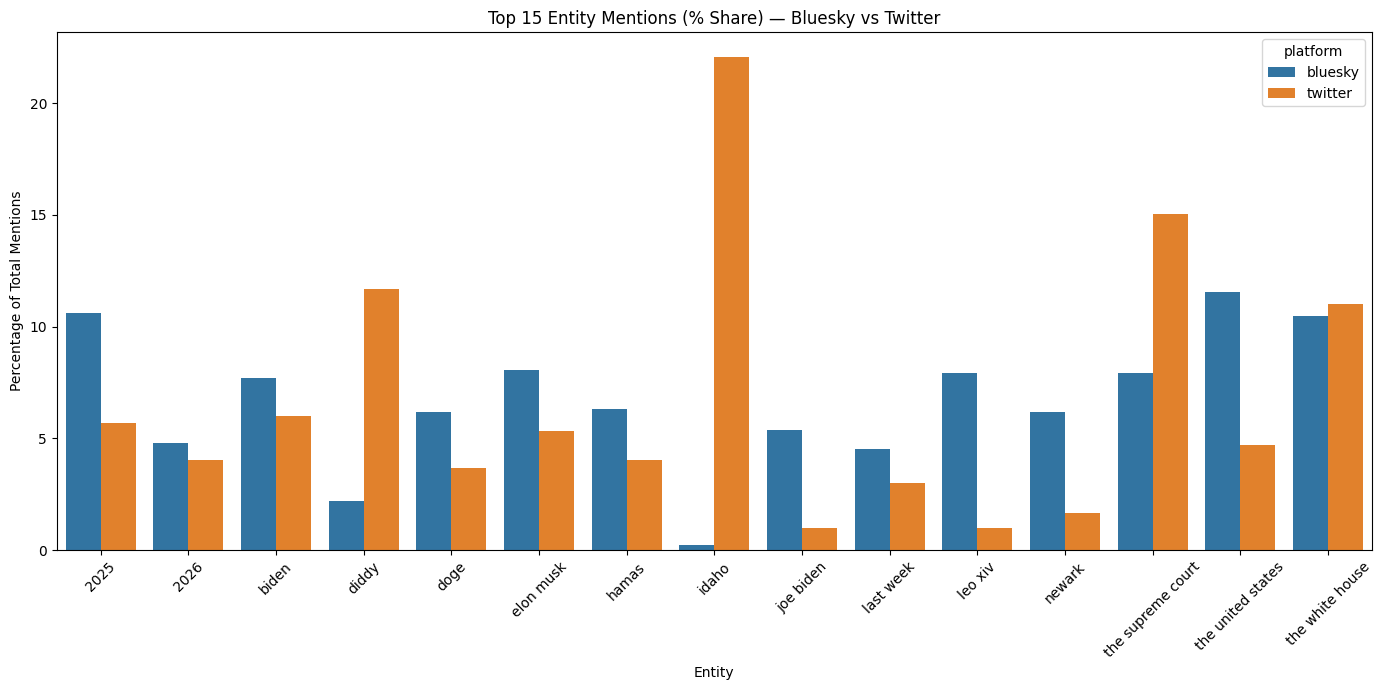

In [71]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === CONFIG ===
root = "/Users/burak/Documents/GitHub/dashboard/data/output_entities_sentiment_structured"
platforms = ["bluesky", "twitter"]

# Define entity stopwords
entity_stopwords = {
    "unknown", "n/a", "none", "please provide the text", "i'm sorry", "example.com", "#cnn#", 'a year',
    'ABC News', '@ABC News', 'BBCNews', 'MSNBC', 'www.nbcnew.com/politics/tru', '@msnbc.com', "n't",
    '@NYTimes', 'the Reuters World News'
}
entity_stopwords = {e.lower() for e in entity_stopwords}

# === LOAD AND CLEAN ===
all_entities = []

for outlet in os.listdir(root):
    outlet_path = os.path.join(root, outlet)
    if not os.path.isdir(outlet_path):
        continue
    for platform in platforms:
        filename = f"{outlet}_{platform}_entities_sentiment_by_date.csv"
        file_path = os.path.join(outlet_path, filename)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            if "entity" in df.columns:
                df["entity"] = df["entity"].astype(str).str.lower().str.strip()
                df = df[~df["entity"].isin(entity_stopwords)]
                df = df[["entity"]]
                df["platform"] = platform
                all_entities.append(df)

# Combine all platform data
if not all_entities:
    raise ValueError("No entity data found for Bluesky or Twitter.")

combined_df = pd.concat(all_entities, ignore_index=True)

# === CALCULATE TOP ENTITIES ===
top_entities = (
    combined_df["entity"]
    .value_counts()
    .head(15)
    .index
    .tolist()
)

filtered_df = combined_df[combined_df["entity"].isin(top_entities)]

# Group and calculate % share per platform
grouped = (
    filtered_df.groupby(["platform", "entity"])
    .size()
    .reset_index(name="count")
)

totals = (
    filtered_df.groupby("platform")
    .size()
    .reset_index(name="total")
)

merged = pd.merge(grouped, totals, on="platform")
merged["percent"] = merged["count"] / merged["total"] * 100

# === PLOT ===
plt.figure(figsize=(14, 7))
sns.barplot(data=merged, x="entity", y="percent", hue="platform")
plt.title("Top 15 Entity Mentions (% Share) — Bluesky vs Twitter")
plt.ylabel("Percentage of Total Mentions")
plt.xlabel("Entity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


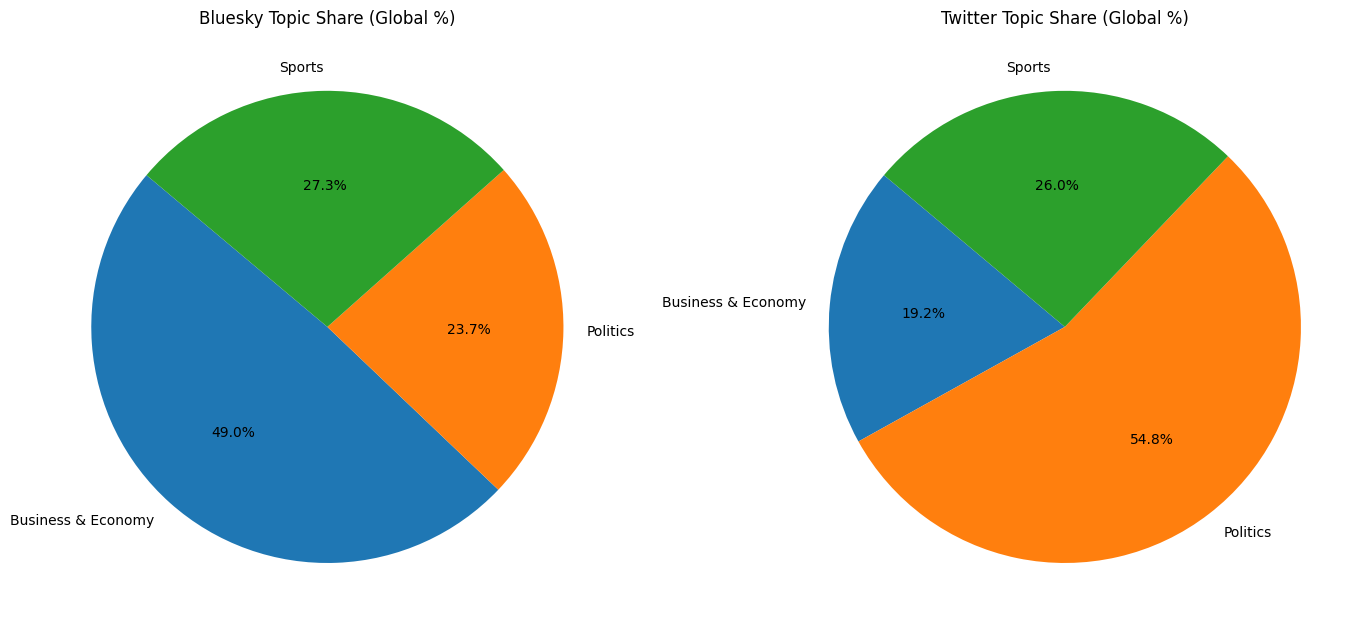

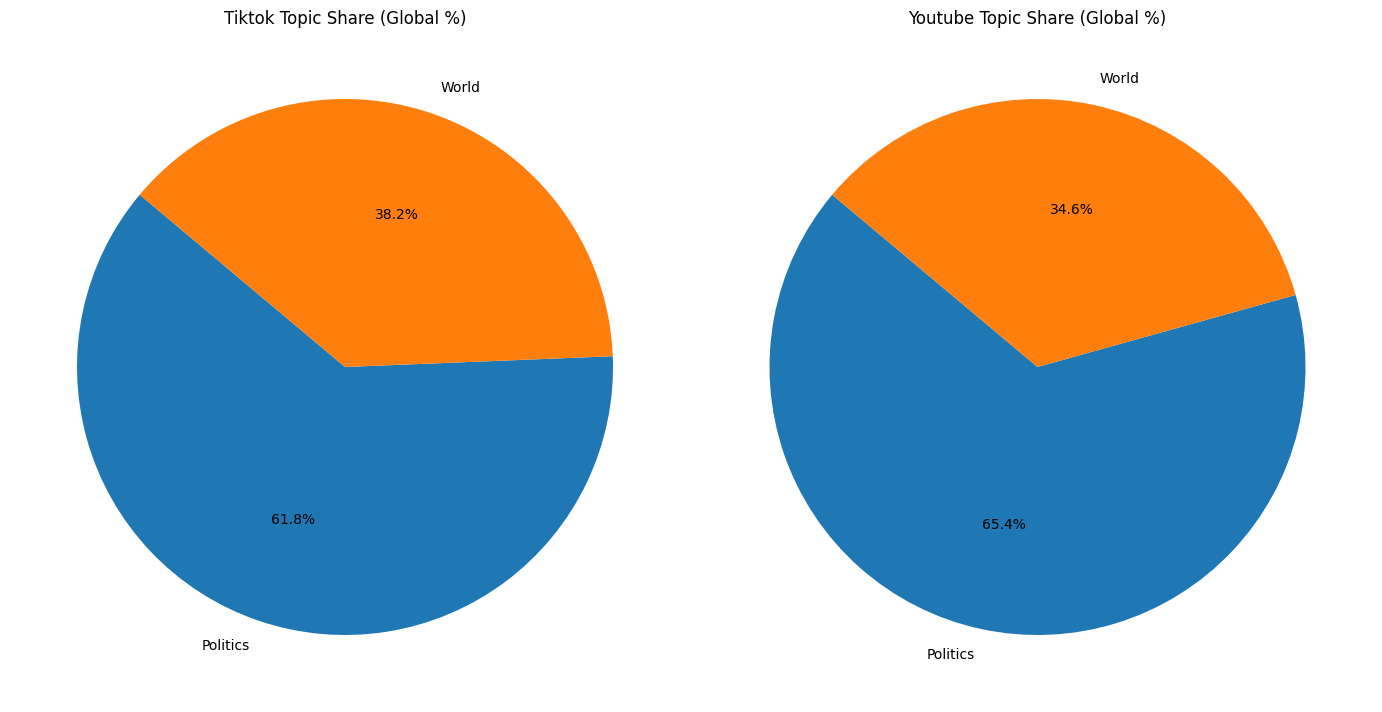

In [102]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIG ===
topic_data_root = "/Users/burak/Documents/GitHub/dashboard/data/"
platform_folders = {
    "tiktok": "tiktok",
    "twitter": "twitter",
    "youtube": "youtube",
    "bluesky": "bluesky"
}
date_cols = {
    "tiktok": "create_time",
    "twitter": "date",
    "youtube": "publishedAt",
    "bluesky": "created_at"
}

# === Load function based on dashboard structure ===
def load_topic_csv(outlet, platform):
    platform_lookup = {k.lower(): v for k, v in platform_folders.items()}
    platform_key = platform.lower()
    if platform_key not in platform_lookup:
        return pd.DataFrame()

    folder_path = os.path.join(topic_data_root, platform_lookup[platform_key])

    try:
        matched_file = next(
            (f for f in os.listdir(folder_path)
             if f.lower().startswith(outlet.lower()) and f.endswith("_with_sections.csv")),
            None
        )
        if not matched_file:
            return pd.DataFrame()

        df = pd.read_csv(os.path.join(folder_path, matched_file))
        date_col = date_cols.get(platform_key)
        if date_col not in df.columns:
            return pd.DataFrame()

        df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
        df[date_col] = df[date_col].dt.tz_localize(None)
        df = df.rename(columns={date_col: "timestamp"})
        df["outlet"] = outlet
        df["platform"] = platform
        return df

    except Exception as e:
        print(f"❌ Error loading file for {outlet}/{platform}: {e}")
        return pd.DataFrame()

# === Plotting Function ===
def plot_topic_distribution_pie(platform1, platform2, top_n=10):
    merged_data = []

    # Use one of the folders to extract outlet list
    example_folder = platform_folders.get("twitter", "twitter")
    outlet_dir = os.path.join(topic_data_root, example_folder)
    outlets = [f.split("_")[0] for f in os.listdir(outlet_dir) if f.endswith("_with_sections.csv")]

    for outlet in outlets:
        for platform in [platform1, platform2]:
            df = load_topic_csv(outlet, platform)
            if not df.empty and "merged_section" in df.columns:
                merged_data.append(df[["timestamp", "merged_section", "platform", "outlet"]])

    if not merged_data:
        raise ValueError("❌ No valid topic data found.")

    combined_df = pd.concat(merged_data, ignore_index=True)
    combined_df.dropna(subset=["merged_section"], inplace=True)

    # Get top N sections across ALL platforms
    top_sections = (
        combined_df["merged_section"]
        .value_counts()
        .head(top_n)
        .index
        .tolist()
    )
    filtered_df = combined_df[combined_df["merged_section"].isin(top_sections)]

    # Group by platform and merged_section (count only)
    grouped = (
        filtered_df.groupby(["platform", "merged_section"])
        .size()
        .reset_index(name="count")
    )

    # Compute percent of TOTAL (not per platform)
    total_all = grouped["count"].sum()
    grouped["percent"] = grouped["count"] / total_all * 100

    # === PLOT PIE CHARTS ===
    platforms_to_plot = [platform1, platform2]
    fig, axs = plt.subplots(1, 2, figsize=(14, 7))

    for i, platform in enumerate(platforms_to_plot):
        data = grouped[grouped["platform"] == platform]
        axs[i].pie(
            data["percent"],
            labels=data["merged_section"],
            autopct="%1.1f%%",
            startangle=140
        )
        axs[i].set_title(f"{platform.capitalize()} Topic Share (Global %)")

    plt.tight_layout()
    plt.show()

# === EXAMPLES ===
plot_topic_distribution_pie("bluesky", "twitter", top_n=3)
plot_topic_distribution_pie("tiktok", "youtube", top_n=2)


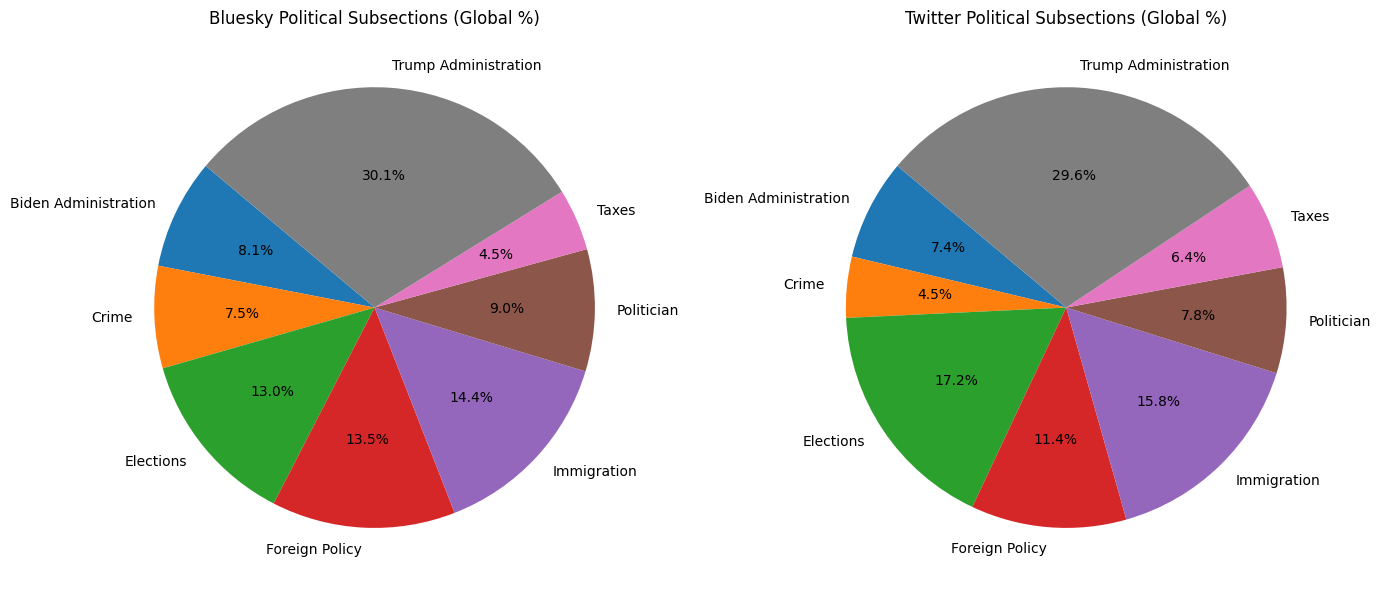

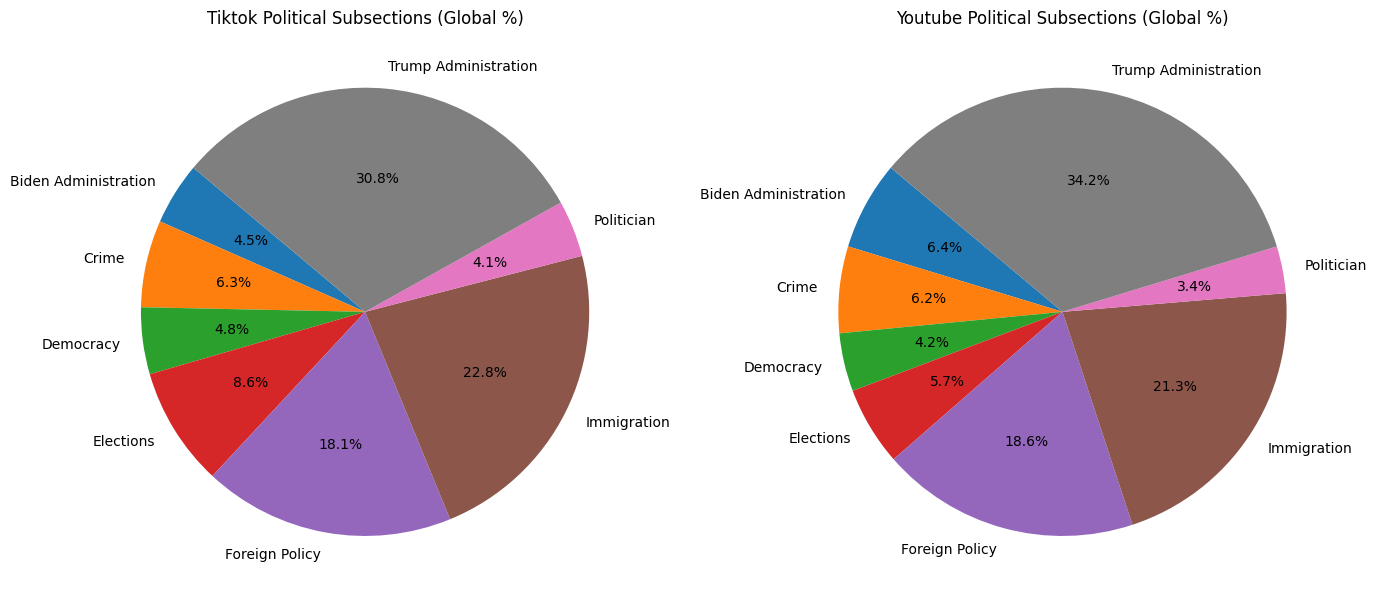

In [95]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIG ===
data_root = "/Users/burak/Documents/GitHub/dashboard/data/"
output_suffix = "_with_subsections.csv"
section_col = "merged_section"
subsection_col = "subsection"

# === FUNCTION ===
def plot_political_subsections(platform1, platform2, top_n=10):
    def load_subsections(platform):
        platform_dir = os.path.join(data_root, platform)
        all_data = []
        for file in os.listdir(platform_dir):
            if not file.endswith(output_suffix):
                continue
            file_path = os.path.join(platform_dir, file)
            try:
                df = pd.read_csv(file_path)
                if subsection_col in df.columns and section_col in df.columns:
                    df["platform"] = platform
                    all_data.append(df[[subsection_col, section_col, "platform"]])
            except Exception as e:
                print(f"❌ Error reading {file}: {e}")
        return pd.concat(all_data, ignore_index=True) if all_data else pd.DataFrame()

    # === LOAD ===
    dfs = []
    for platform in [platform1, platform2]:
        df = load_subsections(platform)
        if not df.empty:
            dfs.append(df)
        else:
            print(f"⚠️ No valid data for platform: {platform}")

    if not dfs:
        raise ValueError("No valid subsection data found for either platform.")

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df.dropna(subset=[subsection_col], inplace=True)
    politics_df = combined_df[combined_df[section_col].str.lower() == "politics"]

    # === TOP N FILTERING (GLOBAL) ===
    top_subsections = (
        politics_df[subsection_col]
        .value_counts()
        .head(top_n)
        .index
        .tolist()
    )
    politics_df = politics_df[politics_df[subsection_col].isin(top_subsections)]

    # === AGGREGATE ===
    grouped = (
        politics_df.groupby(["platform", subsection_col])
        .size()
        .reset_index(name="count")
    )

    # Compute global total (across all platforms)
    total_all = grouped["count"].sum()
    grouped["percent"] = grouped["count"] / total_all * 100

    # === PLOT ===
    fig, axs = plt.subplots(1, 2, figsize=(14, 7))
    for i, platform in enumerate([platform1, platform2]):
        data = grouped[grouped["platform"] == platform]
        axs[i].pie(
            data["percent"],
            labels=data[subsection_col],
            autopct="%1.1f%%",
            startangle=140
        )
        axs[i].set_title(f"{platform.capitalize()} Political Subsections (Global %)")

    plt.tight_layout()
    plt.show()

# === EXAMPLES ===
plot_political_subsections("bluesky", "twitter", top_n=8)
plot_political_subsections("tiktok", "youtube", top_n=8)
